In [1]:
import faircls

In [2]:
%matplotlib widget

import altair as alt
from vega_datasets import data

# Load experimental results

In [3]:
Moji_results = faircls.analysis.retrive_results("Moji", log_dir="../analysis/results")

In [4]:
Moji_plot_df = faircls.analysis.final_results_df(
    # model_order=["Adv","INLP", "DAdv"],
    results_dict = Moji_results,
    pareto = True,
    pareto_selection = "test",
    selection_criterion = None,
    return_dev = True,
    )

## Crete Plot

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
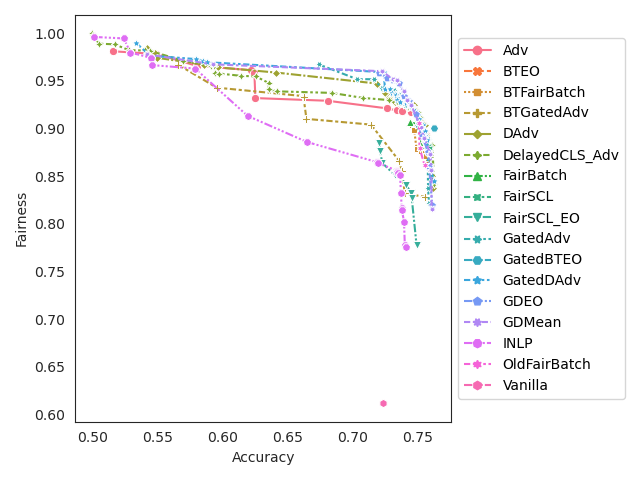

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
def make_plot(plot_df, figure_name=None):
    plot_df["Fairness"] = plot_df["test_fairness mean"]
    plot_df["Accuracy"] = plot_df["test_performance mean"]

    figure = plt.figure(dpi = 100) 
    with sns.axes_style("white"):
        sns.lineplot(
            data=plot_df,
            x="Accuracy",
            y="Fairness",
            hue="Models",
            markers=True,
            style="Models",
        )

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()

    if figure_name is not None:
        figure.savefig(Path(r"plots") / figure_name, dpi=960, bbox_inches="tight") 


make_plot(Moji_plot_df)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
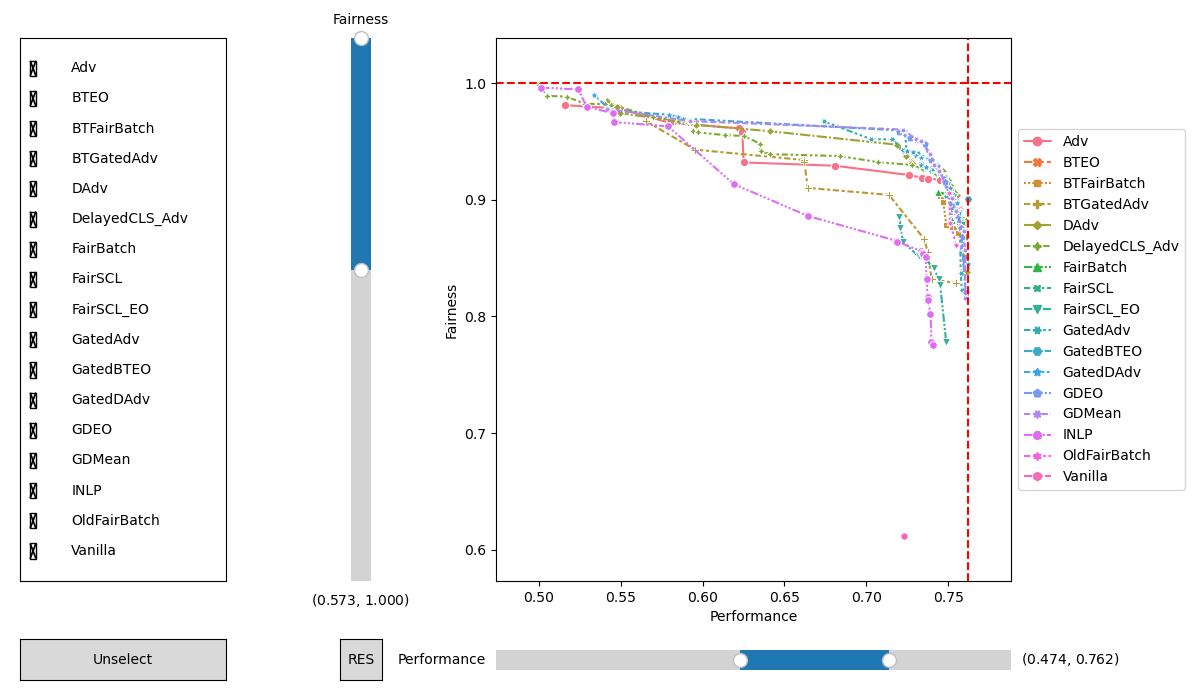

In [6]:
faircls.analysis.tables_and_figures.interactive_plot(Moji_plot_df)